This notebook is meant to walk through the process of mosaicing images to detect transient sources in TTE data. 

In [1]:
import batanalysis as ba
from swifttools.swift_too import GUANO 

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from pathlib import Path
from astropy.io import fits
from astropy.time import Time, TimeDelta
import astropy.units as u
from astropy.coordinates import SkyCoord
import datetime
import os

In [2]:
guano = GUANO(begin="2021-06-26", end="2021-06-27", limit=100)
print(guano)

+--------------+----------------------------+------------+---------------------+----------------+
| Trigger Type |               Trigger Time | Offset (s) | Window Duration (s) | Observation ID |
+--------------+----------------------------+------------+---------------------+----------------+
|      GBM GRB | 2021-06-26 23:46:24.000001 |         50 |                 200 |    00014135005 |
|      GBM GRB |        2021-06-26 08:16:15 |         50 |                 200 |    00036799012 |
|      GBM GRB |        2021-06-26 00:00:00 |         50 |                 200 |    00035785004 |
+--------------+----------------------------+------------+---------------------+----------------+


In [3]:
trigger=guano.entries[1]

In [4]:
tmp_download_dir="/tmp/batdata/download_examples"

ba.datadir(tmp_download_dir, mkdir=True)

download = ba.download_swiftdata(guano[1].obsid, quiet=False)

datadir=ba.datadir().joinpath(guano[1].obsid)

print(download)
print(ba.datadir())

{'00036799012': {'obsid': '00036799012', 'success': True, 'obsoutdir': PosixPath('/private/tmp/batdata/download_examples/00036799012'), 'quicklook': False, 'data': Swift_Data(username='anonymous',obsid='00036799012',quicklook='False',auxil='True',bat='True',xrt='False',uvot='False',log='False',tdrss='True')}}
/private/tmp/batdata/download_examples


/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: SWIFT_TLE_ARCHIVE.txt.21182.87130952.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00036799012pat.fits.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00036799012pjb.par.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00036799012pob.cat.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00036799012ppr

In [10]:
event=ba.BatEvent(guano[1].obsid, is_guano=True, recalc=True)

AttributeError: 'Quantity' object has no 'deg' member

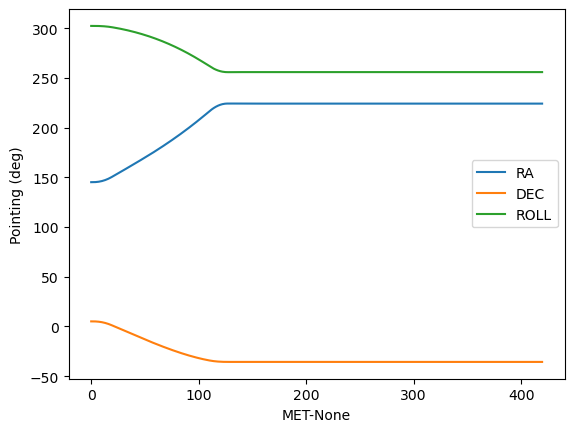

In [6]:
event.attitude.plot()

In [7]:
pointed_event=ba.TimeTaggedEvents.from_file(ba.datadir().joinpath("00036799012/bat/event/sw00036799012bevshpo_uf.evt.gz"))
slew_event=ba.TimeTaggedEvents.from_file(ba.datadir().joinpath("00036799012/bat/event/sw00036799012bevshsl_uf.evt.gz"))

In [12]:
print(pointed_event.time.min(), pointed_event.time.max())
print(slew_event.time.min(), slew_event.time.max())
print(pointed_event.time.size, slew_event.time.size)

646388236.400605 s 646388353.0729051 s
646388153.000505 s 646388236.4005051 s
774402 528212


<IPython.core.display.Javascript object>


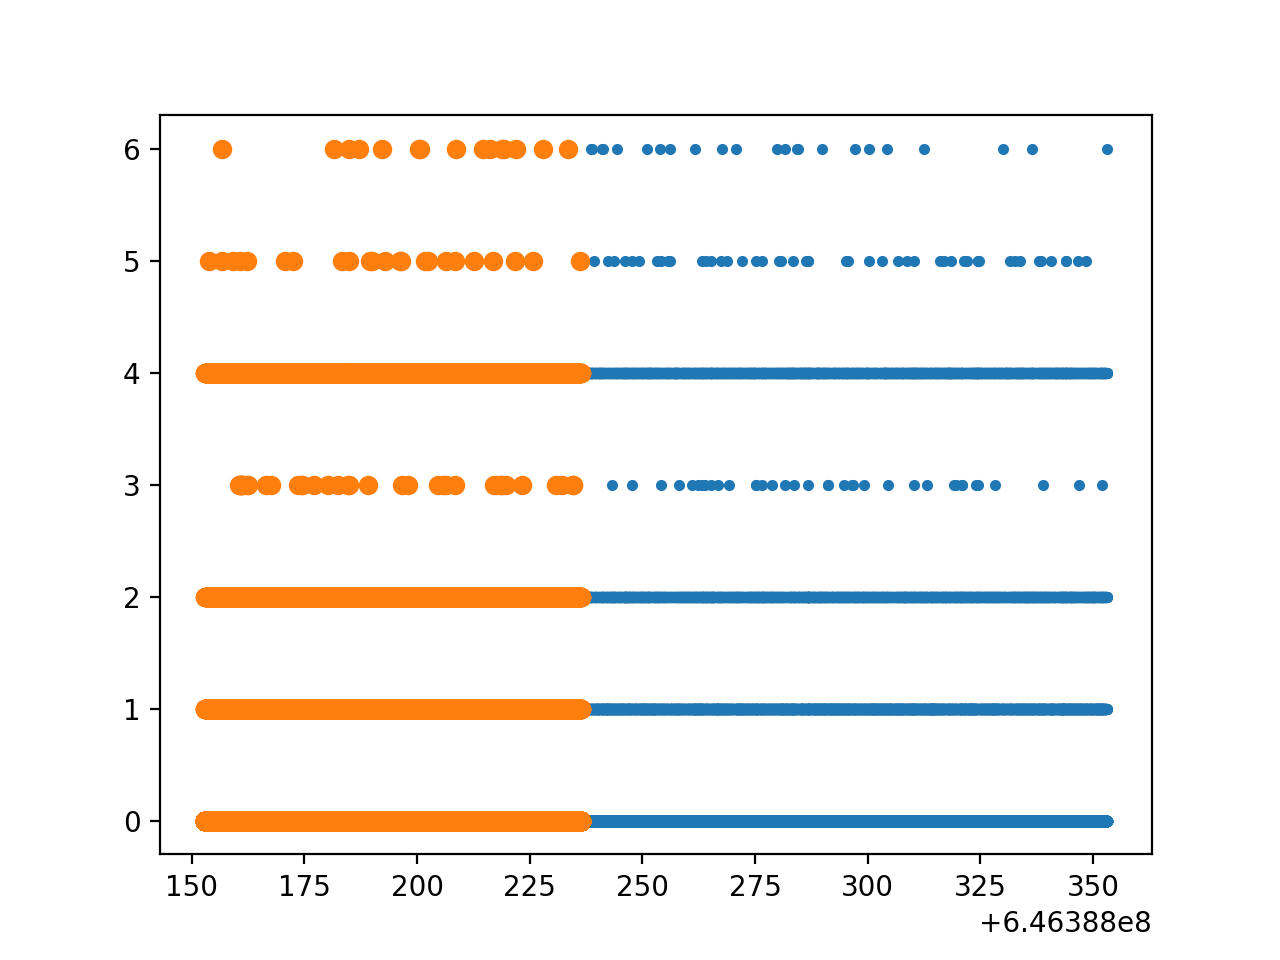

In [14]:
%matplotlib notebook
plt.plot(pointed_event.time, pointed_event.quality_flag, '.')
plt.plot(slew_event.time, slew_event.quality_flag, 'o')

<IPython.core.display.Javascript object>


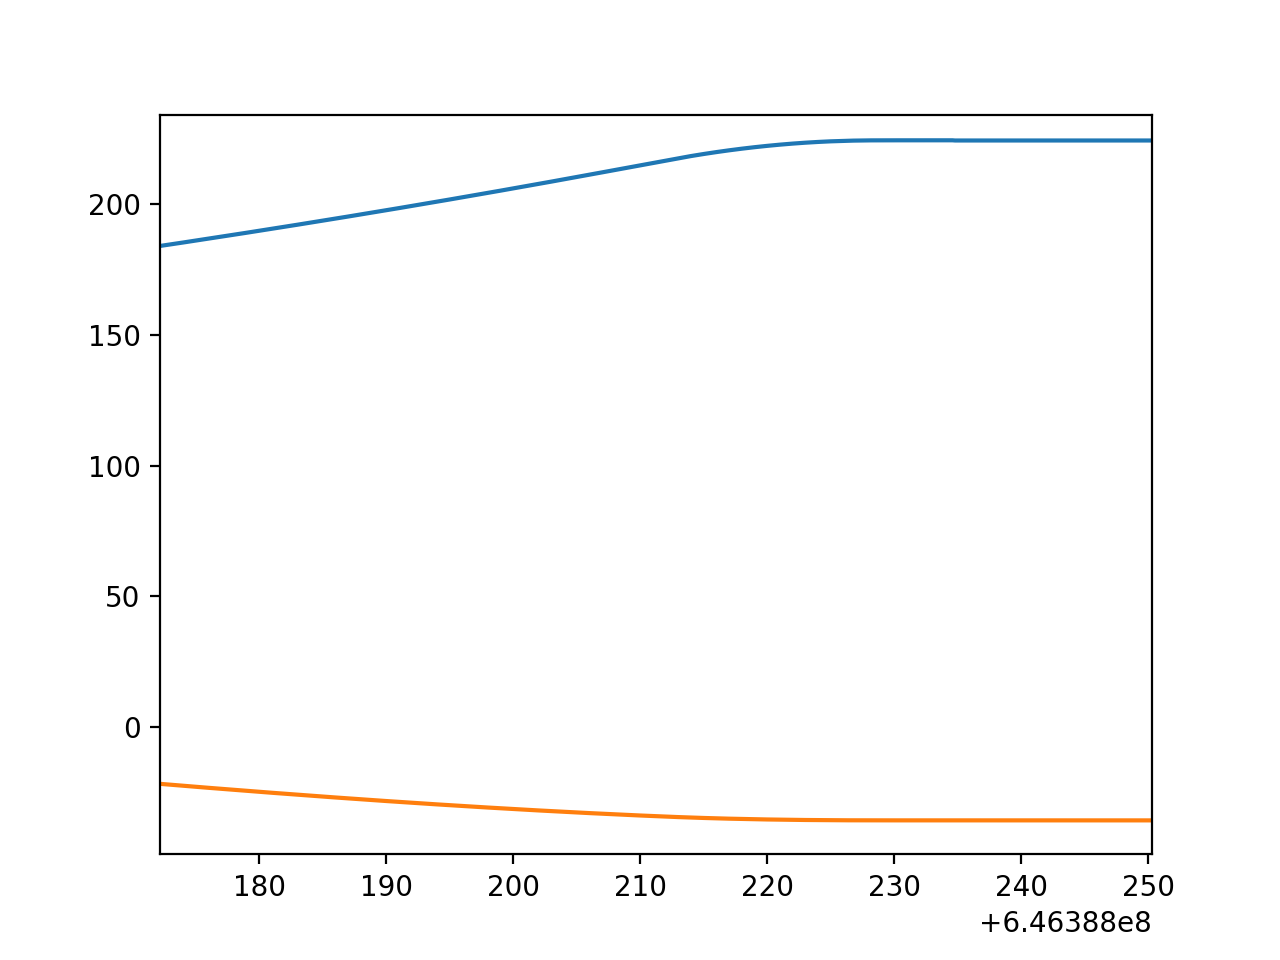

In [15]:
plt.plot(event.attitude.time, event.attitude.ra)
plt.plot(event.attitude.time, event.attitude.dec)